## Import libraries & data

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# from sklearn.preprocessing import Normalizer

In [2]:
data = pd.read_csv("hela.csv")

In [3]:
features = data.iloc[:,0:-1].apply(pd.to_numeric,errors='coerce')

In [4]:
features

,CTCF,DNase,H2A,H3K27ac,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me3,H4K20me1
0,79.44,367.58,134.26,340.10,55.84,128.98,116.06,146.24,225.37,71.78,250.85,97.70,125.74
1,227.68,377.99,143.78,909.55,69.86,111.05,328.55,452.36,848.00,448.88,845.08,105.52,164.28
2,147.91,267.28,208.66,186.35,88.21,65.66,169.68,195.88,384.15,73.11,315.63,122.91,156.95
3,291.95,173.69,155.30,357.10,62.56,154.09,122.71,185.44,297.12,111.28,397.26,127.79,159.28
4,317.60,170.73,176.52,507.94,96.17,280.72,189.48,306.04,574.34,225.78,716.71,129.45,214.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6957,228.90,201.98,117.21,170.08,65.21,241.28,225.36,104.44,116.36,92.24,134.75,118.60,144.20
6958,94.54,68.34,85.99,63.93,65.09,378.16,74.21,91.07,84.32,181.80,86.77,145.77,154.72
6959,443.76,157.66,104.52,71.13,159.14,101.55,62.88,76.72,88.64,90.18,93.01,126.55,177.13
6960,311.80,244.87,112.18,428.63,76.11,337.85,183.92,271.79,462.68,414.16,451.90,104.97,253.35


C:\Users\leyen\anaconda3\lib\site-packages\seaborn\matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


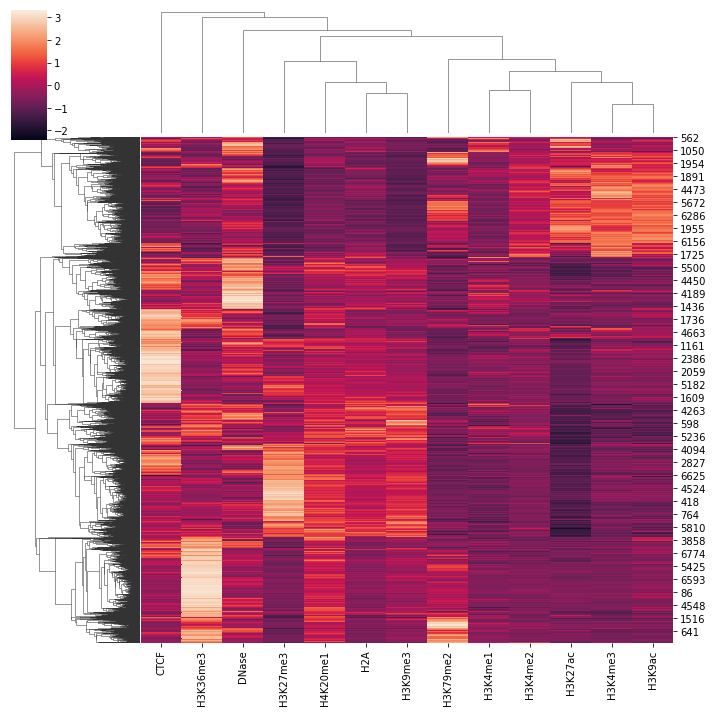

In [5]:
sns.clustermap(features, z_score=0)

## Normalize data

In [6]:
array = features.to_numpy()
normalized_features = stats.zscore(array, axis = 1)

In [7]:
#normalized_features = Normalizer().fit_transform(features)
normalized_features = pd.DataFrame(normalized_features) 
normalized_features.columns = ['CTCF','DNase','H2A','H3K27ac','H3K27me3','H3K36me3','H3K4me1','H3K4me2','H3K4me3','H3K79me2','H3K9ac','H3K9me3','H4K20me1'] 
normalized_features

,CTCF,DNase,H2A,H3K27ac,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me3,H4K20me1
0,-0.880280,2.097782,-0.313689,1.813763,-1.124197,-0.368261,-0.501795,-0.189870,0.627975,-0.959449,0.891323,-0.691554,-0.401748
1,-0.548842,-0.031433,-0.837648,1.798342,-1.092101,-0.950314,-0.201619,0.224569,1.586470,0.212590,1.576419,-0.969350,-0.767082
2,-0.390526,0.928204,0.280605,0.034137,-1.050058,-1.299177,-0.150024,0.139418,2.219317,-1.216874,1.462347,-0.666712,-0.290658
3,0.937091,-0.263683,-0.450409,1.598603,-1.392061,-0.462695,-0.781318,-0.144377,0.989585,-0.897374,2.006374,-0.729737,-0.409998
4,0.095499,-0.721055,-0.688864,1.153732,-1.135586,-0.109543,-0.616810,0.031228,1.522896,-0.414993,2.314431,-0.950559,-0.480375
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6957,1.418478,0.929447,-0.610492,0.349949,-1.555129,1.643375,1.354170,-0.842473,-0.625934,-1.064100,-0.291859,-0.585242,-0.120190
6958,-0.322721,-0.640691,-0.426486,-0.694211,-0.680133,3.119358,-0.569451,-0.364834,-0.446754,0.736287,-0.417020,0.299018,0.407637
6959,3.229931,0.238633,-0.316968,-0.666075,0.254107,-0.348021,-0.752332,-0.607629,-0.483001,-0.466899,-0.437310,-0.086635,0.442200
6960,0.236602,-0.279105,-1.301504,1.136797,-1.579430,0.437322,-0.748735,-0.071682,1.399158,1.025304,1.316097,-1.357059,-0.213765


## Overview

In [8]:
# Cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(features)

array([[1.        , 0.89434936, 0.91821923, ..., 0.62471511, 0.87702809,
        0.85346755],
       [0.89434936, 1.        , 0.89892452, ..., 0.53339423, 0.9284121 ,
        0.96789323],
       [0.91821923, 0.89892452, 1.        , ..., 0.68887734, 0.88918288,
        0.82933718],
       ...,
       [0.62471511, 0.53339423, 0.68887734, ..., 1.        , 0.71625254,
        0.49414605],
       [0.87702809, 0.9284121 , 0.88918288, ..., 0.71625254, 1.        ,
        0.93533774],
       [0.85346755, 0.96789323, 0.82933718, ..., 0.49414605, 0.93533774,
        1.        ]])

## Silhouette coefficient

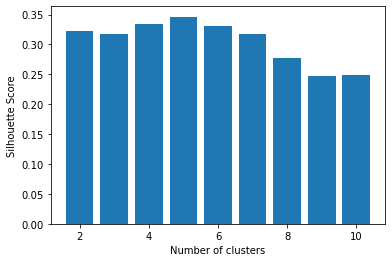

In [9]:
silhouette_scores = [] 

for n_cluster in range(2, 11):
    silhouette_scores.append( 
        silhouette_score(normalized_features, KMeans(n_clusters = n_cluster).fit_predict(normalized_features))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6, 7, 8, 9 ,10] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

## Overview of K-Mean clusters

In [10]:
kmeans = KMeans(
    init="random",
    n_clusters=5,
    n_init=10,
    max_iter=300,
    random_state=12
)

In [11]:
kmeans.fit(normalized_features)

KMeans(init='random', n_clusters=5, random_state=12)

In [12]:
# Inertia
kmeans.inertia_

28239.59000964556

In [13]:
# Clusters' center
kmeans.cluster_centers_

array([[ 0.30257142,  0.05300023,  0.59540781, -1.28472991,  1.72925517,
         0.08484149, -0.7333826 , -0.50744085, -0.67619323, -0.70531732,
        -0.68015279,  0.90415572,  0.91798487],
       [-0.28327752,  0.35756615, -0.57803971,  0.95748407, -1.20787462,
        -0.34545053, -0.52165174,  0.32072155,  1.39225504,  0.31410219,
         1.26430833, -1.02949125, -0.64065194],
       [ 0.18866486,  0.17423443, -0.40016907, -0.65573678, -0.72408039,
         2.51690024, -0.49559025, -0.54424664, -0.63829524,  0.50627149,
        -0.46440311, -0.08452657,  0.62097703],
       [ 2.6551216 ,  0.40428164,  0.19512296, -0.90127688,  0.05532288,
        -0.14948238, -0.47455141, -0.42649541, -0.45687327, -0.73724662,
        -0.40504572, -0.02881527,  0.26993788],
       [ 0.5205411 ,  2.37598161,  0.22235476, -0.53331351, -0.62036605,
         0.06703122,  0.2428735 , -0.26737958, -0.60643214, -0.75539962,
        -0.57300904, -0.06487324, -0.008009  ]])

In [14]:
# Number of iteration
kmeans.n_iter_

14

## Visualization

In [15]:
labels = pd.DataFrame(kmeans.labels_) 
labeled = pd.concat((features,labels),axis=1)
labeled = labeled.rename({0:'labels'},axis=1)

In [16]:
labeled.sort_values('labels')

,CTCF,DNase,H2A,H3K27ac,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me3,H4K20me1,labels
1221,126.16,118.66,128.91,61.38,241.29,97.69,80.56,101.48,107.60,93.26,81.88,165.55,175.44,0
4166,78.43,109.80,114.20,54.05,70.92,106.32,68.54,65.25,57.12,80.97,60.89,151.06,95.32,0
1503,77.74,91.40,104.07,50.30,113.62,79.51,56.27,76.40,61.80,69.10,68.93,120.67,102.34,0
4169,111.99,136.05,123.32,46.85,144.47,92.22,104.25,84.16,82.75,81.06,63.97,132.68,130.74,0
4173,55.86,61.52,72.18,42.37,121.60,99.10,49.01,64.09,41.78,55.93,47.66,86.86,116.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5913,54.59,143.88,112.51,40.11,61.07,108.37,59.82,62.70,42.14,52.81,39.91,98.33,92.37,4
5912,60.69,152.85,106.87,36.18,71.84,100.92,67.57,58.75,45.98,58.41,45.30,89.33,74.79,4
1168,168.18,198.95,159.65,85.22,166.46,133.73,119.04,102.55,101.73,89.91,107.27,147.45,138.61,4
4265,97.47,223.06,131.69,59.64,73.86,138.09,95.87,86.09,58.02,63.13,70.50,133.76,107.43,4


C:\Users\leyen\anaconda3\lib\site-packages\seaborn\matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


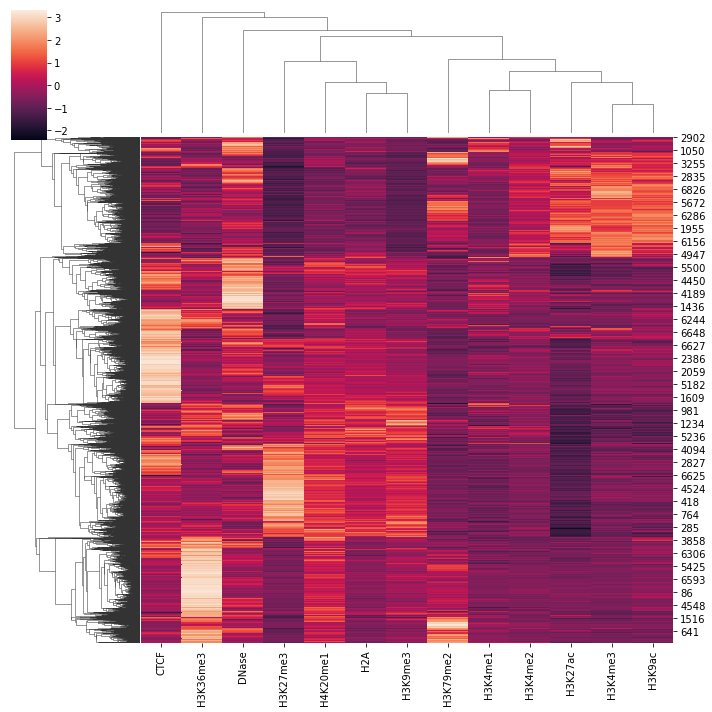

In [17]:
sns.clustermap(labeled.sort_values('labels').iloc[:,0:-1], z_score=0)

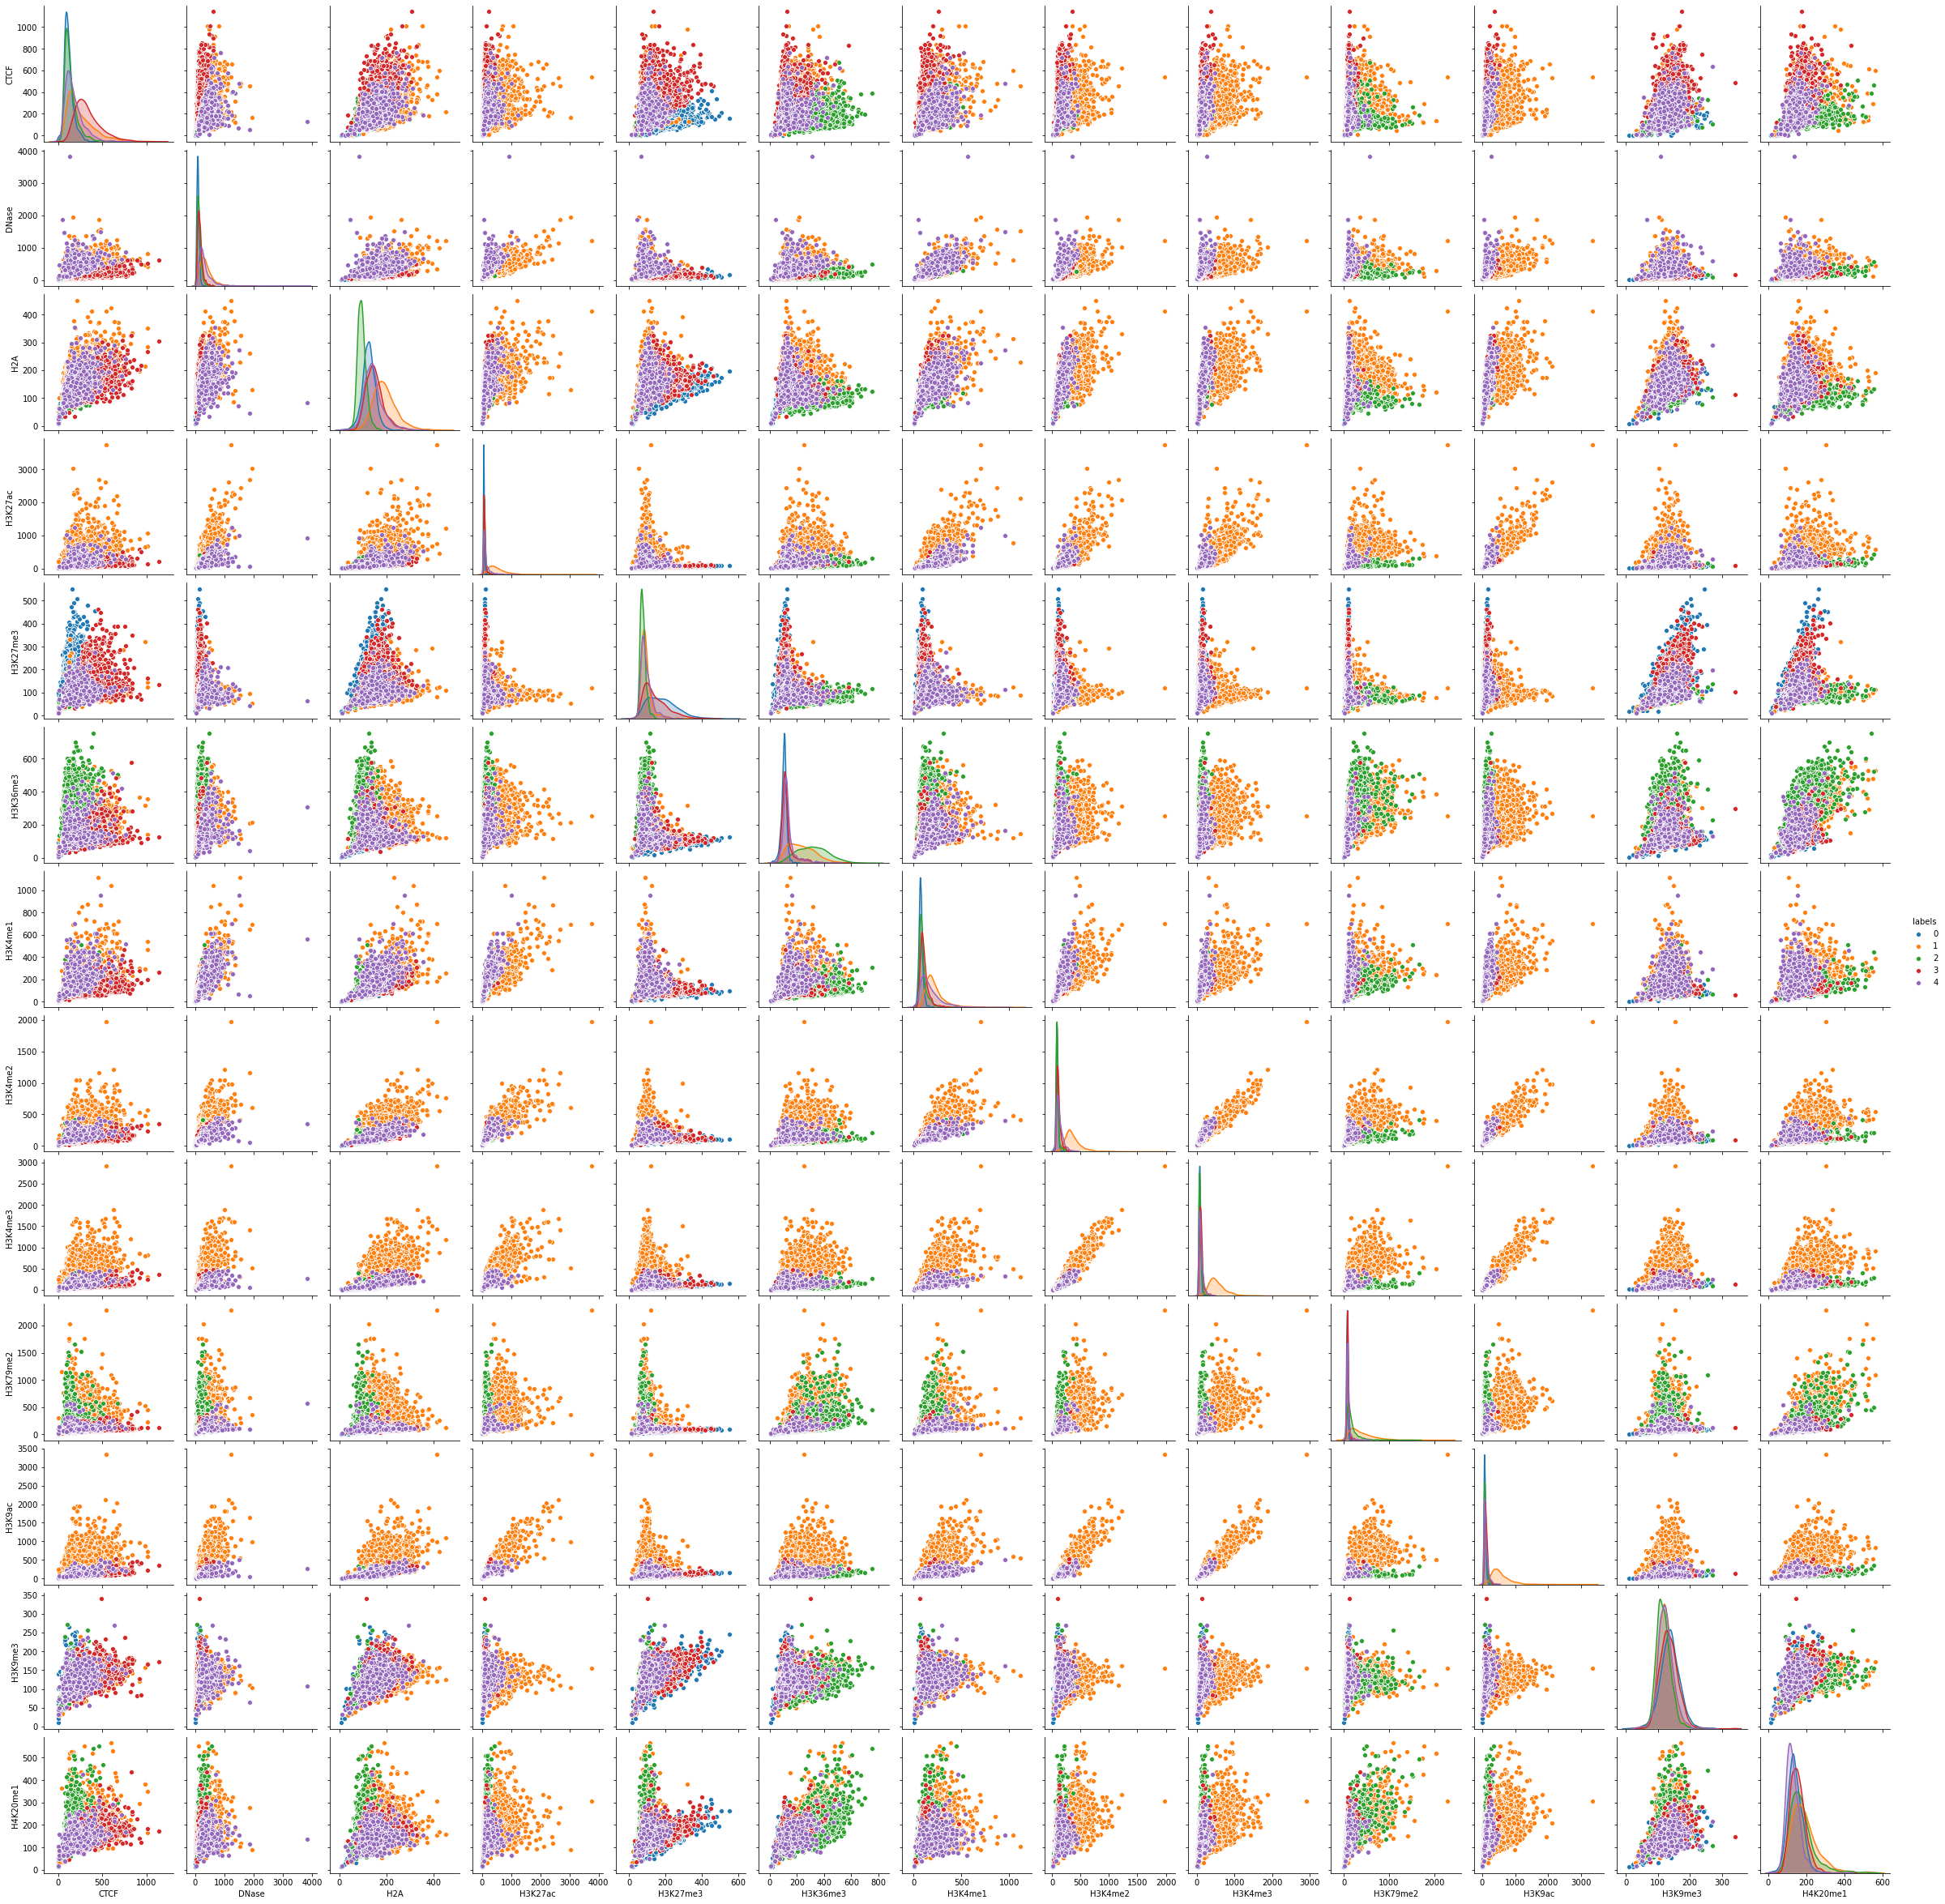

In [18]:
sns.pairplot(labeled,hue='labels')

In [19]:
labeled['Constant'] = "Data"

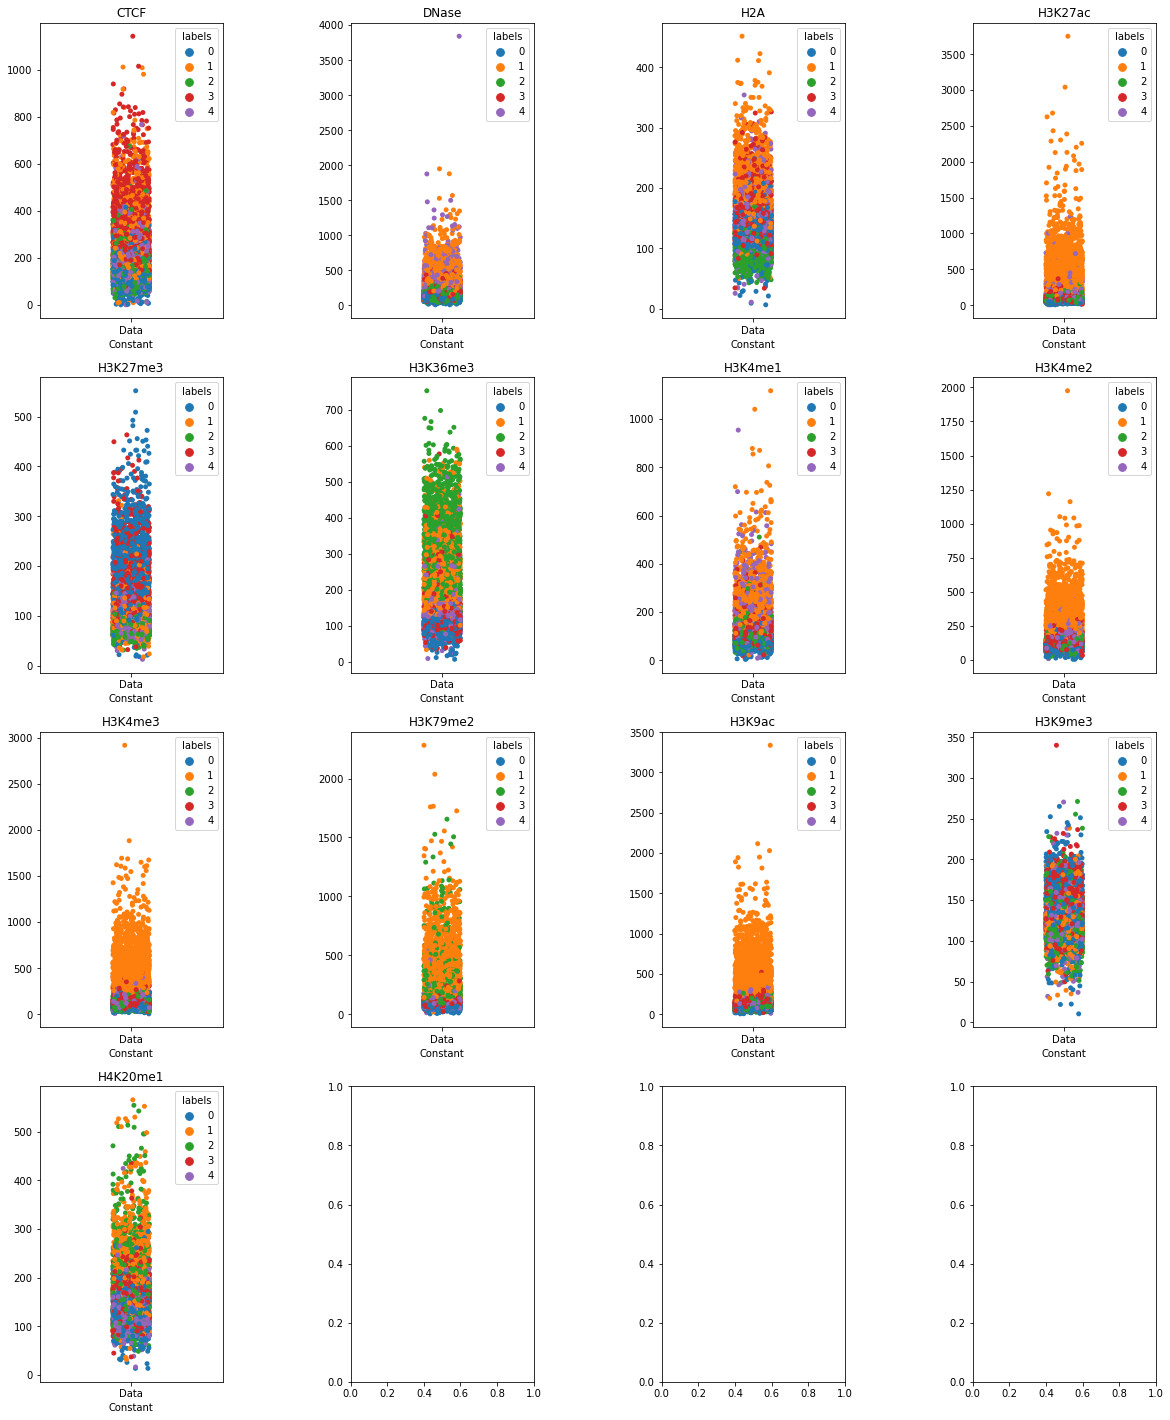

In [20]:
f, axes = plt.subplots(4, 4, figsize=(20, 25), sharex=False) 
f.subplots_adjust(hspace=0.2, wspace=0.7) 
for i in range(0,len(list(labeled))-2): 
    col = labeled.columns[i]
    if i < 4:
        ax = sns.stripplot(x=labeled['Constant'],y=labeled[col].values,hue=labeled['labels'],jitter=True,ax=axes[0,(i)])
        ax.set_title(col)
    elif i >= 4 and i<8:
        ax = sns.stripplot(x=labeled['Constant'],y=labeled[col].values,hue=labeled['labels'],jitter=True,ax=axes[1,(i-4)]) 
        ax.set_title(col)
    elif i >= 8 and i<12:
        ax = sns.stripplot(x=labeled['Constant'],y=labeled[col].values,hue=labeled['labels'],jitter=True,ax=axes[2,(i-8)])
        ax.set_title(col)
    elif i >= 12:
        ax = sns.stripplot(x=labeled['Constant'],y=labeled[col].values,hue=labeled['labels'],jitter=True,ax=axes[3,(i-12)])
        ax.set_title(col)